### 실습 | MNIST 손글씨 인식하기 : 데이터 전처리

학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


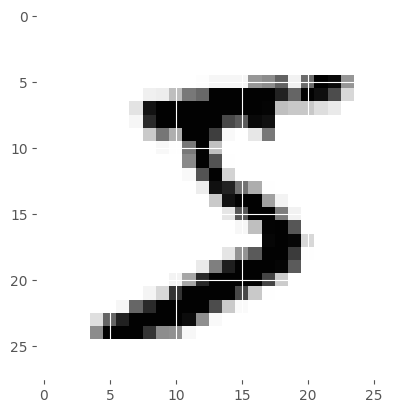

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import sys

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("학습셋 이미지 수 : %d개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d개" % (X_test.shape[0]))

plt.imshow(X_train[0], cmap='Greys')
plt.show();

for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')
    
X_train = X_train.reshape(-1, 28*28).astype('float64') / 255.
X_test = X_test.reshape(-1, 28*28).astype('float64') / 255.

print("class : %d " % (y_train[0]))

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

### 실습 | MNIST 손글씨 인식하기 : 기본 프레임

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Epoch 1: val_loss improved from inf to 0.19134, saving model to ./model\MNIST_MLP.hdf5


d:\python_project\파이썬 데이터분석 폴더\every_deeplearning\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.19134 to 0.14272, saving model to ./model\MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.14272 to 0.11012, saving model to ./model\MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11012 to 0.09937, saving model to ./model\MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.09937 to 0.09376, saving model to ./model\MNIST_MLP.hdf5

Epoch 6: val_loss did not improve from 0.09376

Epoch 7: val_loss improved from 0.09376 to 0.08362, saving model to ./model\MNIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.08362

Epoch 9: val_loss did not improve from 0.08362

Epoch 10: val_loss did not improve from 0.08362

Epoch 11: val_loss improved from 0.08362 to 0.08129, saving model to ./model\MNIST_MLP.hdf5

Epoch 12: val_loss did not improve from 0.08129

Epoch 13: val_loss improved from 0.08129 to 0.08095, saving model to ./model\MNIST_MLP.hdf5

Epoch 14: val_loss did not improve from 0.08095

Epoch 15: val_loss did not improve from 0.08095

Epoch 16: val

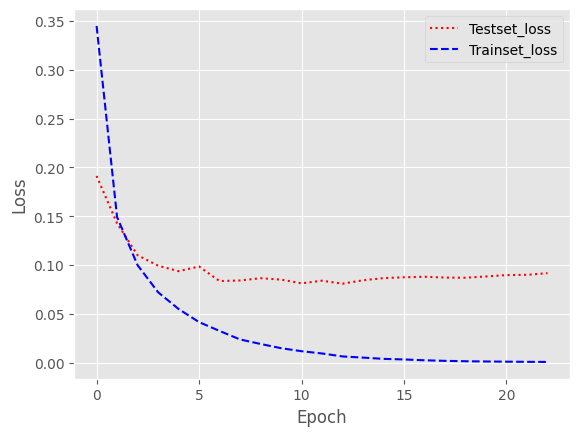

In [3]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
import os
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28*28).astype('float64') / 255.
X_test = X_test.reshape(-1, 28*28).astype('float64') / 255.

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28, )))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

MODEL_DIR = "./model/"
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath = "./model/MNIST_MLP.hdf5"

cp = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, 
                    validation_split=0.25, epochs=30, batch_size=200,
                    verbose=0, callbacks=[cp, es])

print("\n Test Accuracy : %.4f" % (model.evaluate(X_test, y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "r:", label='Testset_loss')
plt.plot(x_len, y_loss, "b--", label="Trainset_loss")

plt.legend()
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

### 실습 | MNIST 손글씨 인식하기 : CNN 적용

d:\python_project\파이썬 데이터분석 폴더\every_deeplearning\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 6s 17ms/step - loss: 0.0292 - acc: 0.9902

 Test Accuracy : 0.9901999831199646


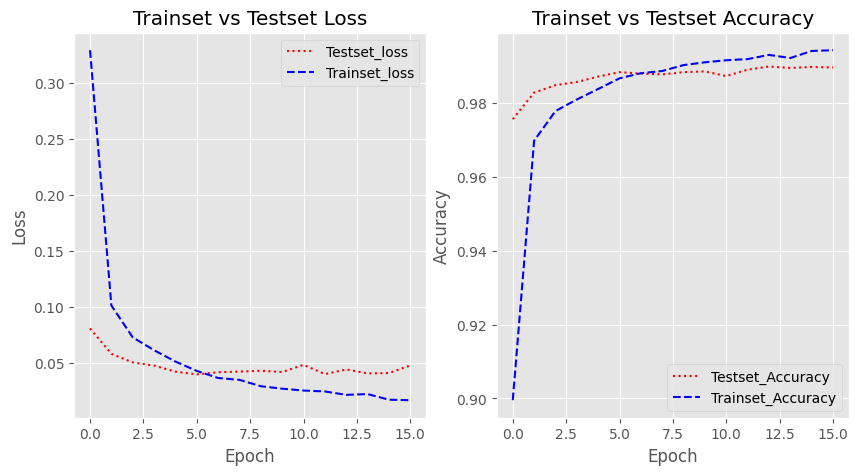

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import os

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float64') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float64') / 255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['acc'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath = './model/MNIST_CNN.hdf5'

cp = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.25, 
                    epochs=30, batch_size=200, verbose=0, callbacks=[es, cp])

print("\n Test Accuracy : {}".format(model.evaluate(X_test, y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']
y_vacc = history.history['val_acc']
y_acc = history.history['acc']
epoch = np.arange(len(y_loss))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epoch, y_vloss, 'r:', label='Testset_loss')
plt.plot(epoch, y_loss, 'b--', label='Trainset_loss')
plt.title('Trainset vs Testset Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(epoch, y_vacc, 'r:', label='Testset_Accuracy')
plt.plot(epoch, y_acc, 'b--', label='Trainset_Accuracy')
plt.title('Trainset vs Testset Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show();